In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans , AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage , dendrogram
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings(action="ignore")
plt.rcParams["figure.figsize"] = (12,8)

In [2]:
data = pd.read_csv("Country-data (1).csv")
df = data.copy()
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

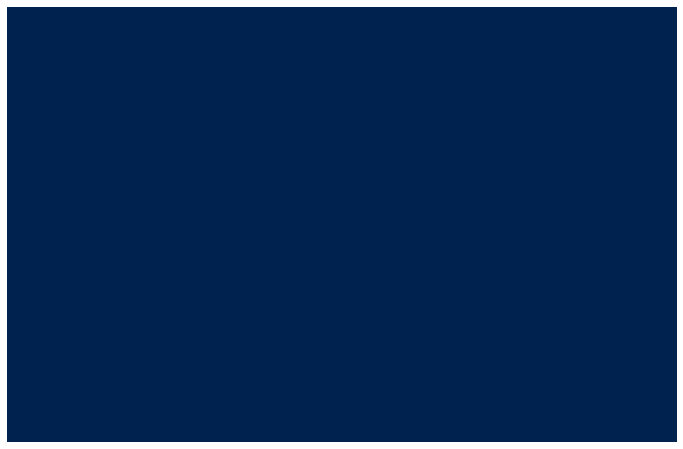

In [4]:
sns.heatmap(data = df.isnull() , cmap = "cividis" , cbar = False , yticklabels=False , xticklabels=False)
plt.show()

In [5]:
df.duplicated().sum()

0

In [6]:
X = df.drop(columns = ["country"])

In [7]:
pca = PCA()
pca.fit_transform(X)
pca.explained_variance_ratio_

array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

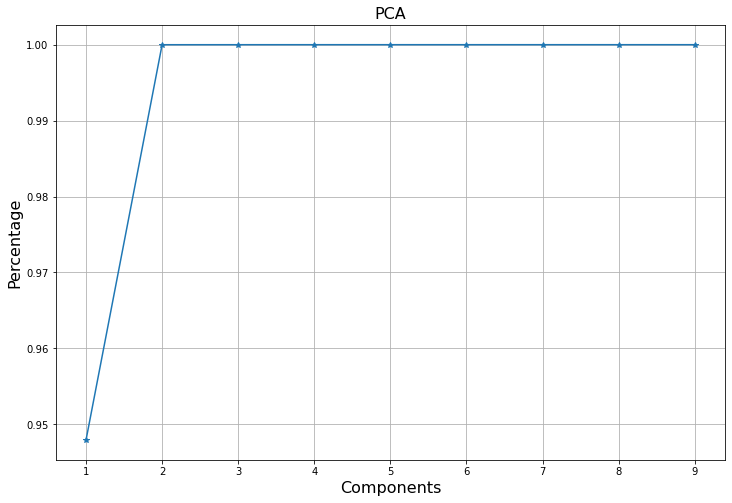

In [8]:
plt.plot(range(1,X.shape[1] + 1) , pca.explained_variance_ratio_.cumsum() , marker = "*" , label = "futures")
plt.title("PCA" , fontsize = 16)
plt.xlabel("Components" , fontsize = 16)
plt.ylabel("Percentage" , fontsize = 16)
plt.grid()
plt.show()

In [9]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.94792307, 0.05207346])

In [10]:
wcss = []
for x in range(1,11) : 
    kmeans = KMeans(n_clusters=x , init = "k-means++" , random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

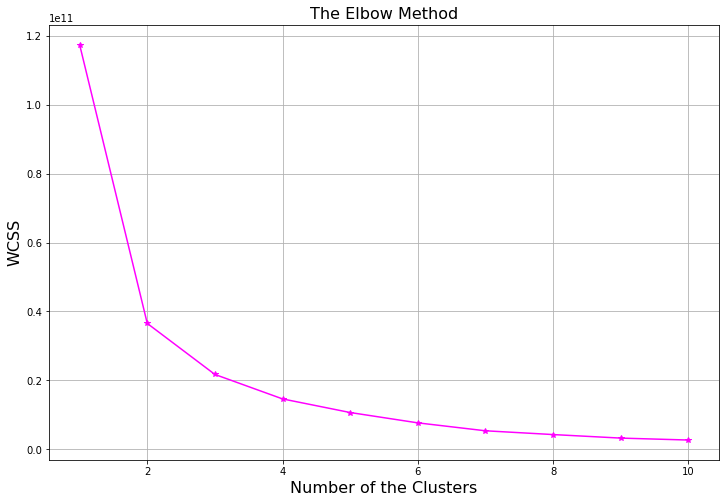

In [11]:
plt.plot(range(1,11) , wcss , marker = "*" , color = "magenta")
plt.title("The Elbow Method" , fontsize = 16)
plt.ylabel("WCSS" , fontsize = 16)
plt.xlabel("Number of the Clusters" , fontsize = 16)
plt.grid()
plt.show()
#It can be 3 and 4 so I will check both of them

In [30]:
num_clusters= [3,4]

for x in num_clusters : 
    kmeans = KMeans(n_clusters=x , init = "k-means++" , random_state=42)
    label = kmeans.fit_predict(X)
    sil = silhouette_score(X , label)
    
    print("The number of the clusters is {}. The silouette score is {}".format(x , sil))
    
# Verilen Task onusz 3 cluster olmasini teleb edir. Her ehtimalla check etdim.

The number of the clusters is 3. The silouette score is 0.7003631023034658
The number of the clusters is 4. The silouette score is 0.6109541954473029


In [13]:
kmeans = KMeans(n_clusters=3 , init = "k-means++" , random_state=42)
label = kmeans.fit_predict(X)

In [14]:
sil = silhouette_score(X , label)
sil

0.7003631023034658

In [15]:
df = pd.concat([df, pd.DataFrame(data = label)] , axis = 1)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [16]:
df.rename(columns = {0 : "KMeans"} , inplace = True)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [17]:
df.loc[df["KMeans"] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,1
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,1
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,1


In [18]:
df["KMeans"] = df["KMeans"].map({0 : "underdeveloping" , 1: "developing" , 2 : "developed"})

In [19]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,underdeveloping
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,underdeveloping
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,underdeveloping
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,underdeveloping
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,underdeveloping


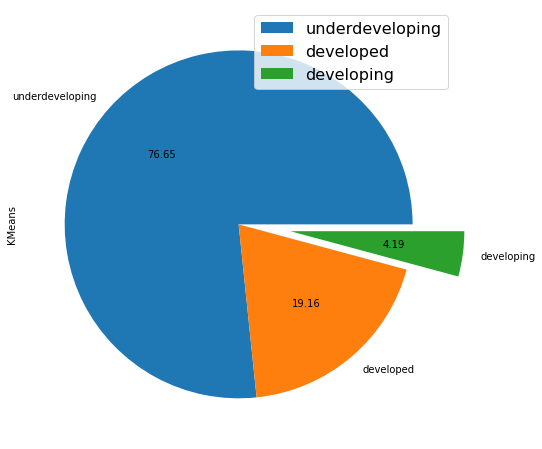

In [20]:
df["KMeans"].value_counts().plot(kind = "pie" , autopct = "%.2f" , explode = [0.0 , 0.0 , 0.3])
plt.legend(loc = 'best' , fontsize = 16)
plt.show()

# Agglomeratiove

In [21]:
X = df.drop(columns = ["country" , "KMeans"])

In [22]:
pca = PCA()
X = pca.fit_transform(X)
pca.explained_variance_ratio_

array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

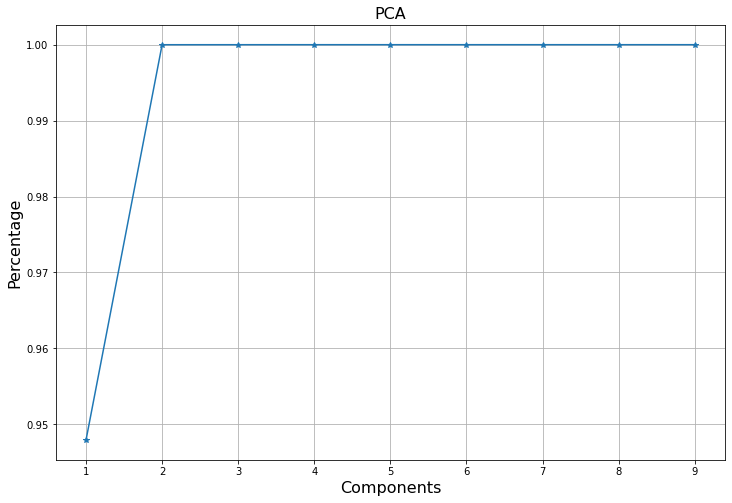

In [23]:
plt.plot(range(1,X.shape[1] + 1) , pca.explained_variance_ratio_.cumsum() , marker = "*")
plt.title("PCA" , fontsize = 16)
plt.xlabel("Components" , fontsize = 16)
plt.ylabel("Percentage" , fontsize = 16)
plt.grid()
plt.show()

In [24]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.94792307, 0.05207346])

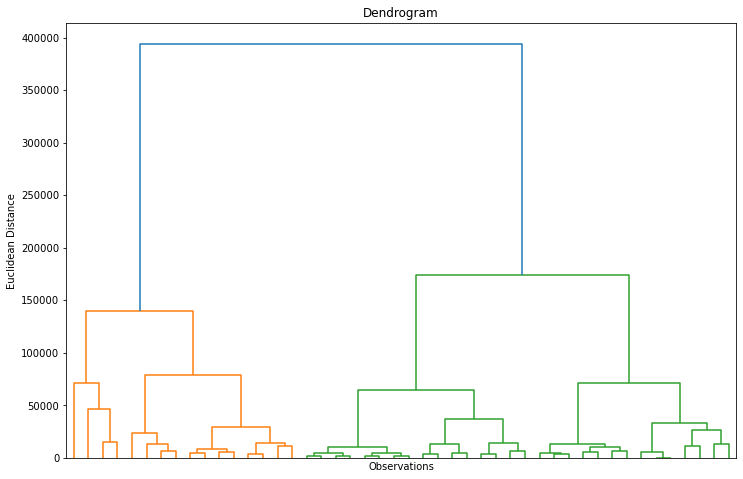

In [25]:
dendrogram(Z = linkage(y = X , method = "ward" , metric="euclidean") , p = 5 , truncate_mode="level" , no_labels=True)
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Euclidean Distance")
plt.show()

In [26]:
aglomeratgive = AgglomerativeClustering(n_clusters=3 , affinity="euclidean" , linkage="ward")
label = aglomeratgive.fit_predict(X)

score = silhouette_score(X = X , labels = label , random_state=42)
print("The socre of the KMeans is {:.2f}".format(score))

The socre of the KMeans is 0.60


In [27]:
df = pd.concat([df , pd.DataFrame(data=label)] , axis =1)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans,0
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,underdeveloping,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,underdeveloping,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,underdeveloping,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,underdeveloping,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,underdeveloping,1


In [28]:
df.rename(columns = {0 : "Agglomerative"} , inplace = True)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans,Agglomerative
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,underdeveloping,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,underdeveloping,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,underdeveloping,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,underdeveloping,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,underdeveloping,1


In [37]:
df["Agglomerative"] = df["Agglomerative"].map({0 : "developed" , 1 : "developing" , 2 : "underdeveloping"})

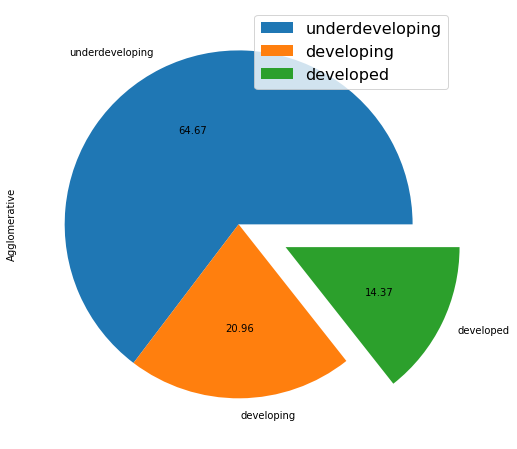

In [38]:
df["Agglomerative"].value_counts().plot(kind = "pie" , autopct = "%.2f" , explode = [0.0 , 0.0 , 0.3])
plt.legend(loc = 'best' , fontsize = 16)
plt.show()